### Import required libraris

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import natsort
from PIL import Image
import os
from re import search
import shutil

from tqdm import tqdm
import cv2
import scipy as scipy

#### Importing Directoris

In [2]:
DIR=r'C:\Users\hch0a\OneDrive\Desktop\python\Apple\DATA\images'

#### Data Preperation

In [3]:
train=pd.read_csv(r'C:\Users\hch0a\OneDrive\Desktop\python\Apple\DATA\Record\train.csv')
test=pd.read_csv(r'C:\Users\hch0a\OneDrive\Desktop\python\Apple\DATA\Record\test.csv')

In [4]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [5]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


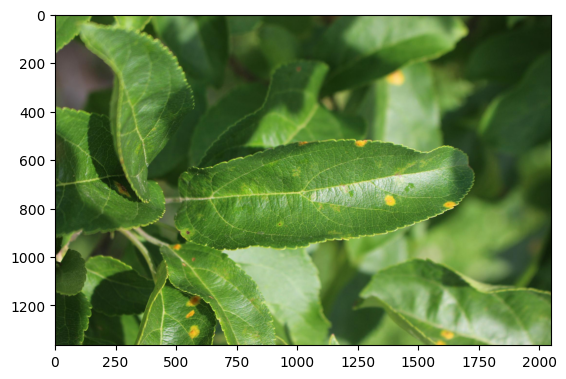

In [6]:
image1=Image.open(r'C:\Users\hch0a\OneDrive\Desktop\python\Apple\DATA\images\test_0.jpg')
plt.imshow(image1)
plt.show()

In [7]:
class_names=train.loc[:,'healthy':].columns
print(class_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [8]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label']+train[i]*number
    number=number+1

In [9]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [44]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [11]:
plt.figure(figsize = (10,10))
for image_batch, labels_batch in train.take(1): # take first batch.
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

TypeError: len() of unsized object

<Figure size 1000x1000 with 0 Axes>

In [45]:
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)

        if search("Train",img):
            
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'C:\Users\hch0a\OneDrive\Desktop\python\Apple\DATA\train\healthy')
            
            elif (img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'C:\Users\hch0a\OneDrive\Desktop\python\Apple\DATA\train\multi_disease')
            
            elif (img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'C:\Users\hch0a\OneDrive\Desktop\python\Apple\DATA\train\rust')
            
            elif (img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'C:\Users\hch0a\OneDrive\Desktop\python\Apple\DATA\train\scab')
        
        elif search('Test',img):
            shutil.copy(path,r'C:\Users\hch0a\OneDrive\Desktop\python\Apple\DATA\Test')
            

In [46]:
shutil.os.mkdir(r'C:\Users\hch0a\OneDrive\Desktop\python\Apple\DATA\train')
shutil.os.mkdir(r'C:\Users\hch0a\OneDrive\Desktop\python\Apple\DATA\train\healthy')
shutil.os.mkdir(r'C:\Users\hch0a\OneDrive\Desktop\python\Apple\DATA\train\multi_disease')
shutil.os.mkdir(r'C:\Users\hch0a\OneDrive\Desktop\python\Apple\DATA\train\rust')
shutil.os.mkdir(r'C:\Users\hch0a\OneDrive\Desktop\python\Apple\DATA\train\scab')

shutil.os.mkdir(r'C:\Users\hch0a\OneDrive\Desktop\python\Apple\DATA\test')


In [47]:
tain_dir=create_train_data()

100%|██████████████████████████████████████████████████████████████████████████████| 3642/3642 [00:56<00:00, 64.21it/s]


# Pre-Prosesing

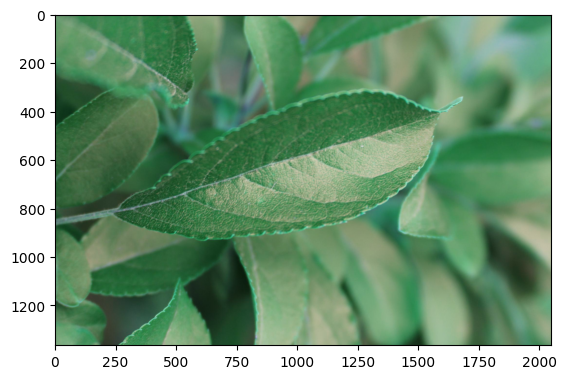

In [48]:
Train_DIR=r'C:\Users\hch0a\OneDrive\Desktop\python\Apple\DATA\train'
Catagories=['healthy','multi_disease','rust','scab']

for j in Catagories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break

<function matplotlib.pyplot.show(close=None, block=None)>

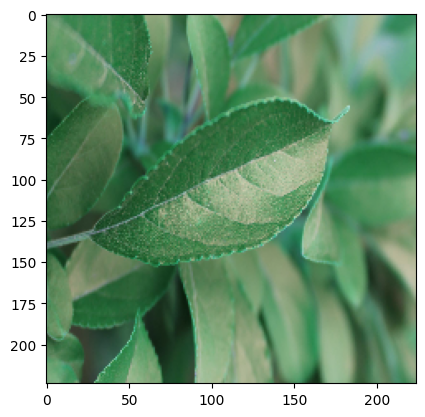

In [49]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show

# Model

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D




In [51]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)

train_datagen=datagen.flow_from_directory(r'C:\Users\hch0a\OneDrive\Desktop\python\Apple\DATA\train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                          batch_size=16,
                                          class_mode='categorical',
                                          subset='training')

                                          
val_datagen=datagen.flow_from_directory(r'C:\Users\hch0a\OneDrive\Desktop\python\Apple\DATA\train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                          batch_size=16,
                                          class_mode='categorical',
                                          subset='validation')

Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


In [52]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu', padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

#compile the model

                              
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 28, 28, 64)       

In [53]:
checkpoint=ModelCheckpoint(r'C:\Users\hch0a\OneDrive\Desktop\python\Apple\apple2.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]
                           

In [54]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                  epochs=30,
                                  steps_per_epoch=train_datagen.samples//16,
                                  validation_steps=val_datagen.samples//16,
                                  callbacks=callbacks)

C:\Users\hch0a\AppData\Local\Temp\ipykernel_17980\3338300017.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(train_datagen,validation_data=val_datagen,


Epoch 1/30
91/91 [==============================] - ETA: 0s - loss: 1.2657 - accuracy: 0.3141
Epoch 1: val_loss improved from inf to 1.23979, saving model to C:\Users\hch0a\OneDrive\Desktop\python\Apple\apple2.h5
91/91 [==============================] - 142s 2s/step - loss: 1.2657 - accuracy: 0.3141 - val_loss: 1.2398 - val_accuracy: 0.3750
Epoch 2/30


C:\Users\hch0a\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


91/91 [==============================] - ETA: 0s - loss: 1.2433 - accuracy: 0.3578
Epoch 2: val_loss did not improve from 1.23979
91/91 [==============================] - 117s 1s/step - loss: 1.2433 - accuracy: 0.3578 - val_loss: 1.3422 - val_accuracy: 0.3551
Epoch 3/30
91/91 [==============================] - ETA: 0s - loss: 1.1222 - accuracy: 0.4945
Epoch 3: val_loss improved from 1.23979 to 0.88023, saving model to C:\Users\hch0a\OneDrive\Desktop\python\Apple\apple2.h5
91/91 [==============================] - 124s 1s/step - loss: 1.1222 - accuracy: 0.4945 - val_loss: 0.8802 - val_accuracy: 0.6903
Epoch 4/30
91/91 [==============================] - ETA: 0s - loss: 0.8082 - accuracy: 0.6775
Epoch 4: val_loss improved from 0.88023 to 0.65626, saving model to C:\Users\hch0a\OneDrive\Desktop\python\Apple\apple2.h5
91/91 [==============================] - 117s 1s/step - loss: 0.8082 - accuracy: 0.6775 - val_loss: 0.6563 - val_accuracy: 0.7386
Epoch 5/30
91/91 [============================

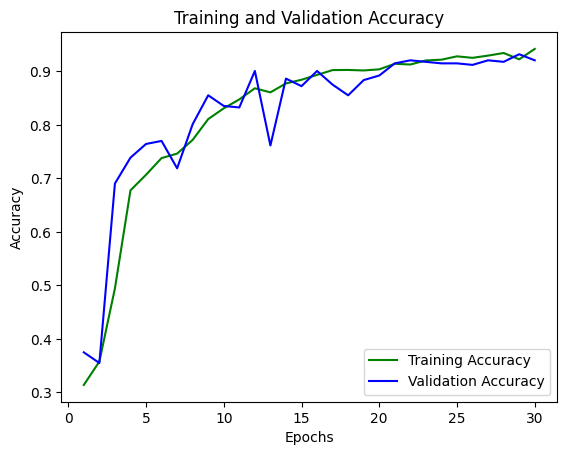

In [55]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,31)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

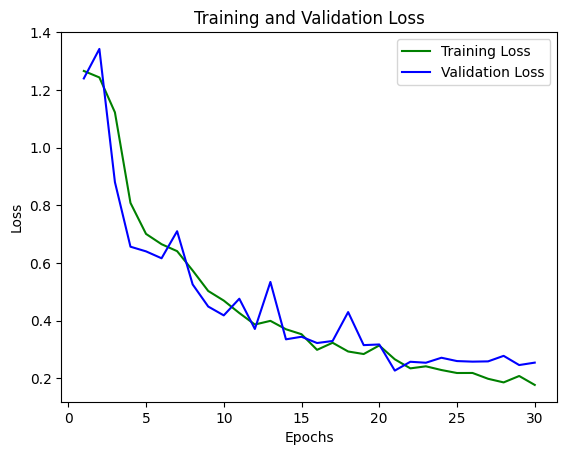

In [56]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,31)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Making the prediction on singel img

In [1]:
test_image=r"C:\Users\hch0a\OneDrive\Desktop\python\Apple\DATA\images\Train_104.jpg"
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image


test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['healthy','multipule_disease','rust','scab']
#Categories[np.argmax(result)]
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()



NameError: name 'Image' is not defined